In [ ]:
from tcrnet import process, visualize

In [18]:
# path to your TCR data
tcr_filepath = "/krummellab/data1/danb/tcrnet_issue/data/SARCOID1-POOL-GC1-SCT1/filtered_contig_annotations.csv"

In [19]:
clonotype_definition = ['cdr1', 'cdr2', 'cdr3']

In [20]:
# load TCR data and standardize the format
tcr_df = process.standardize_tcr_data(tcr_filepath=tcr_filepath, 
                                      clonotype_definition=clonotype_definition,
                                      technology_platform='10X')

In [31]:
# tcr_df.columns

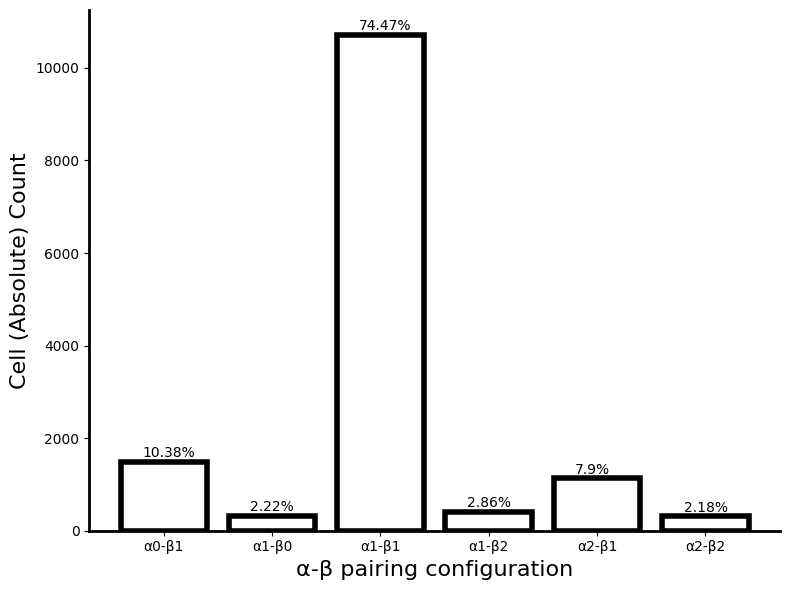

In [22]:
# generate QC plot showing the different alpha-beta pairing configurations in the data
visualize.chain_pairing_configurations(tcr_df=tcr_df)

In [23]:
# preprocess TCR data (chain pairing, QC, and clonotype definition)
ptcr_df = process.preprocess_tcr_data(tcr_df=tcr_df)

# records before QC: (29138, 32)
# records after QC 1 - Missing CDR sequences: (29137, 32)
# records after alpha-beta Pairing: (16874, 63)
# records after QC 2 - Missing Chain Pairings: (13299, 64)


/c4/home/alaa/src/dev_scripts/tcrnet/tcrnet/process.py:313: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  orphan_alpha_df = orphan_alpha_df.loc[orphan_alpha_df['chain_identifier_alpha']!=''].fillna('')
/c4/home/alaa/src/dev_scripts/tcrnet/tcrnet/process.py:319: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  orphan_beta_df = orphan_beta_df.loc[orphan_beta_df['chain_identifier_beta']!=''].fillna('')


In [24]:
# compute clonotype abundances (absolute counts and relative frequencies)
qtcr_df = process.compute_clonotype_abundances(processed_tcr_df=ptcr_df)

In [26]:
qtcr_df

,sample_id,clonotype_id,num_records,total_records,pct_records,alpha_cdr1_aa,beta_cdr1_aa,alpha_cdr2_aa,beta_cdr2_aa,alpha_cdr3_aa,beta_cdr3_aa,alpha_cdr1_aa_length,beta_cdr1_aa_length,alpha_cdr2_aa_length,beta_cdr2_aa_length,alpha_cdr3_aa_length,beta_cdr3_aa_length
6449,,TRDTTYY_RNSFDEQN_CALSEADDYKLSF-MNHEY_SVGEGT_CA...,158,13299,0.011881,TRDTTYY,MNHEY,RNSFDEQN,SVGEGT,CALSEADDYKLSF,CASSNRADKANEQFF,7,5,8,6,13,15
10003,,YGATPY_YFSGDTLV_CAVATSGGSYIPTF-MNHEY_SMNVEV_CA...,101,13299,0.007595,YGATPY,MNHEY,YFSGDTLV,SMNVEV,CAVATSGGSYIPTF,CASIGNTEAFF,6,5,8,6,14,11
9525,,VSGNPY_YITGDNLV_CGIIDKFYF-MNHEY_SVGEGT_CASSYSS...,80,13299,0.006015,VSGNPY,MNHEY,YITGDNLV,SVGEGT,CGIIDKFYF,CASSYSSGGEQYF,6,5,8,6,9,13
3937,,NSMFDY_ISSIKDK_CAASGPYSGAGSYQLTF-MNHNY_SVGAGI_...,80,13299,0.006015,NSMFDY,MNHNY,ISSIKDK,SVGAGI,CAASGPYSGAGSYQLTF,CASSYNGLNRVANEKLFF,6,5,7,6,17,18
5196,,SSVSVY_YLSGSTLV_CASYYPYGGSQGNLIF-LNHDA_SQIVND_...,78,13299,0.005865,SSVSVY,LNHDA,YLSGSTLV,SQIVND,CASYYPYGGSQGNLIF,CASSIPWTGLDTEAFF,6,5,8,6,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,,NSMFDY_ISSIKDK_CAANSGAGSYQLTF-SEHNR_FQNEAQ_CAS...,1,13299,0.000075,NSMFDY,SEHNR,ISSIKDK,FQNEAQ,CAANSGAGSYQLTF,CASSYDGNEAFF,6,5,7,6,14,12
3645,,NSMFDY_ISSIKDK_CAANSGGGADGLTF-LGHNA_YNFKEQ_CAS...,1,13299,0.000075,NSMFDY,LGHNA,ISSIKDK,YNFKEQ,CAANSGGGADGLTF,CASSQGESSYNEQFF,6,5,7,6,14,15
3646,,NSMFDY_ISSIKDK_CAANSGNTGKLIF-SEHNR_FQNEAQ_CASS...,1,13299,0.000075,NSMFDY,SEHNR,ISSIKDK,FQNEAQ,CAANSGNTGKLIF,CASSPSQGGDGYTF,6,5,7,6,13,14
3647,,NSMFDY_ISSIKDK_CAANTFSGGGADGLTF-GTSNPN_SVGIG_C...,1,13299,0.000075,NSMFDY,GTSNPN,ISSIKDK,SVGIG,CAANTFSGGGADGLTF,CAWSVGTDEQYF,6,6,7,5,16,12


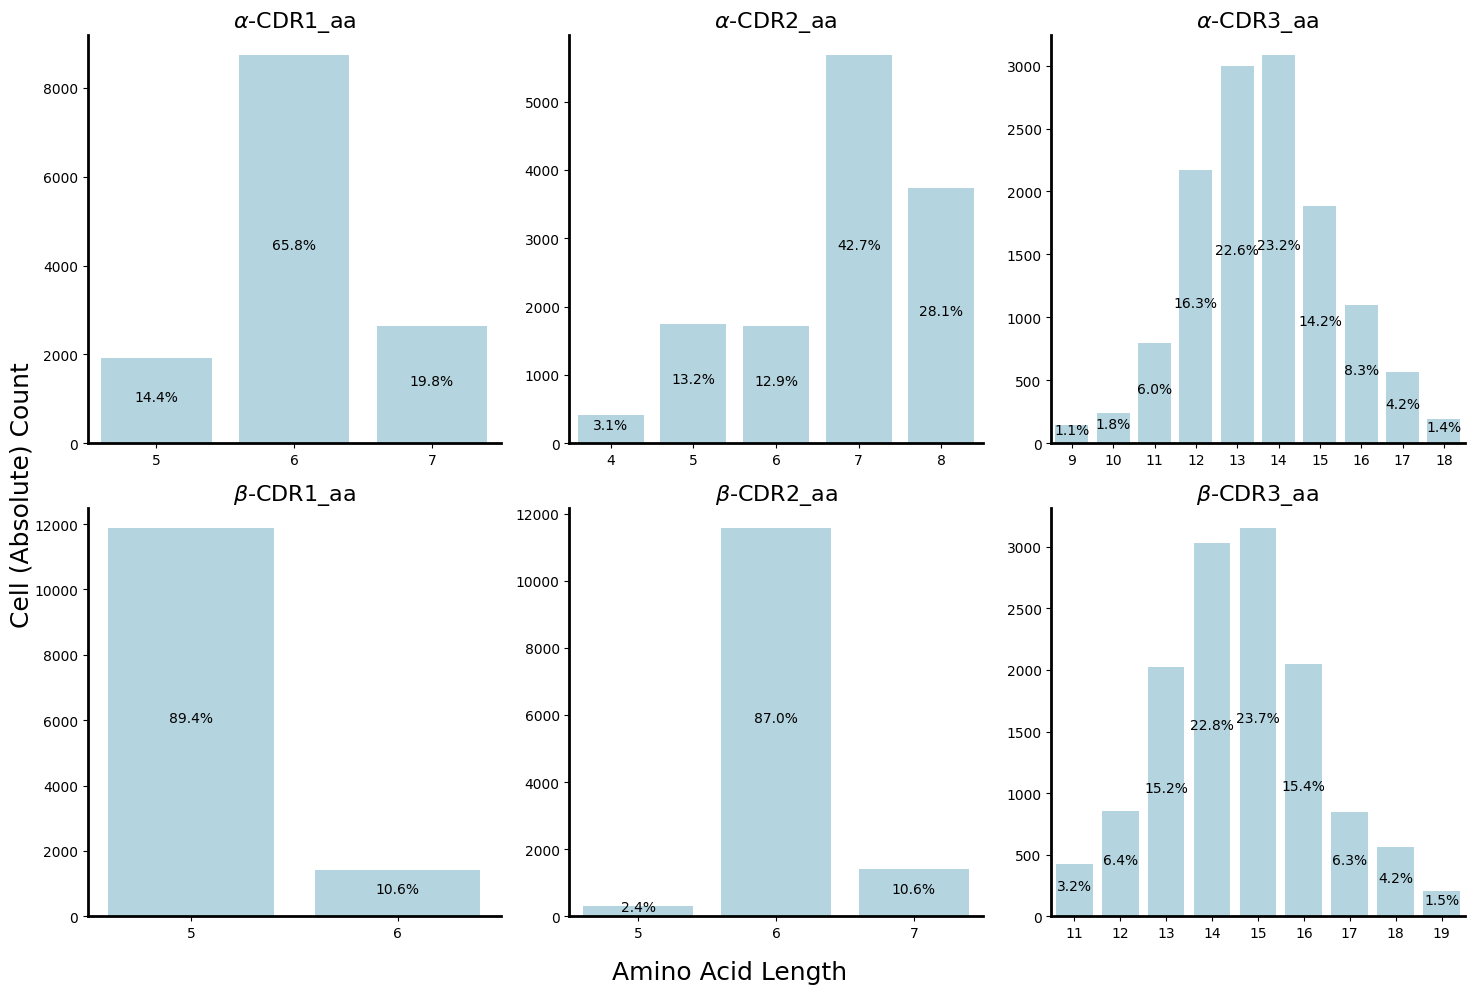

In [27]:
# generate panel of bar plots showing sequence length distribution across complementarity determining regions
visualize.sequence_length_distributions(tcr_df=qtcr_df, 
                                        seq_len_colnames=['alpha_cdr1_aa_length', 
                                                          'alpha_cdr2_aa_length', 
                                                          'alpha_cdr3_aa_length', 
                                                          'beta_cdr1_aa_length', 
                                                          'beta_cdr2_aa_length', 
                                                          'beta_cdr3_aa_length'])

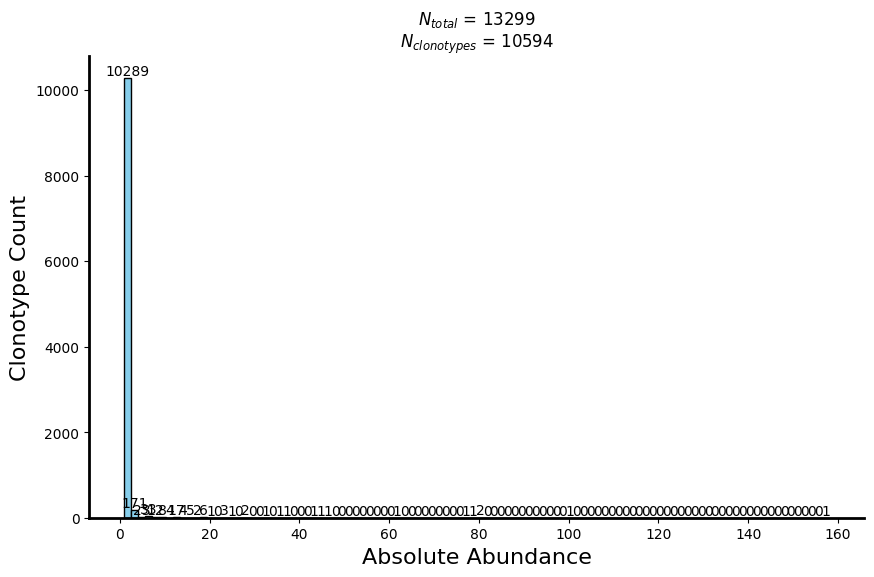

In [28]:
# generate histogram of clonotype abundances (most will likely have count = 1)
visualize.clonotype_abundances(tcr_df=qtcr_df)

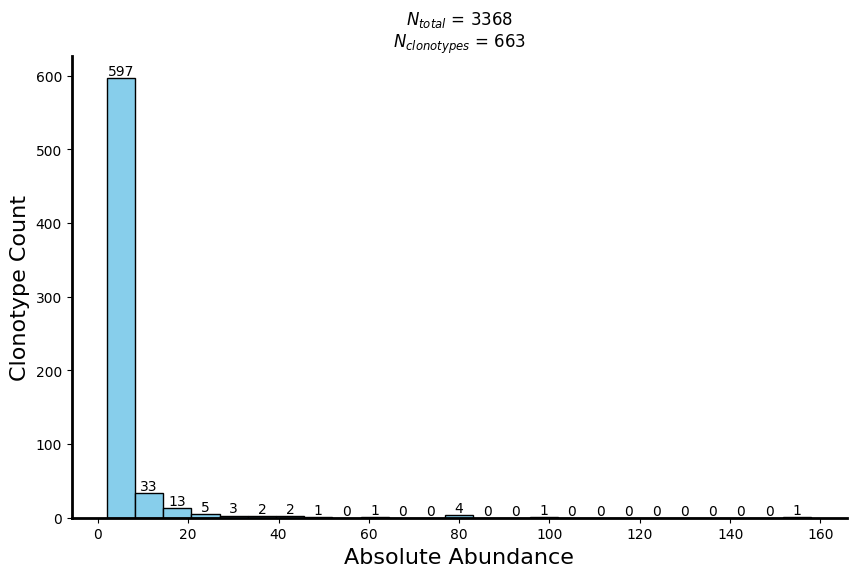

In [29]:
# it is usually more helpful to look at clonotype abundances for clonotypes with counts > 1
visualize.clonotype_abundances(tcr_df=qtcr_df.loc[qtcr_df['num_records']>1])

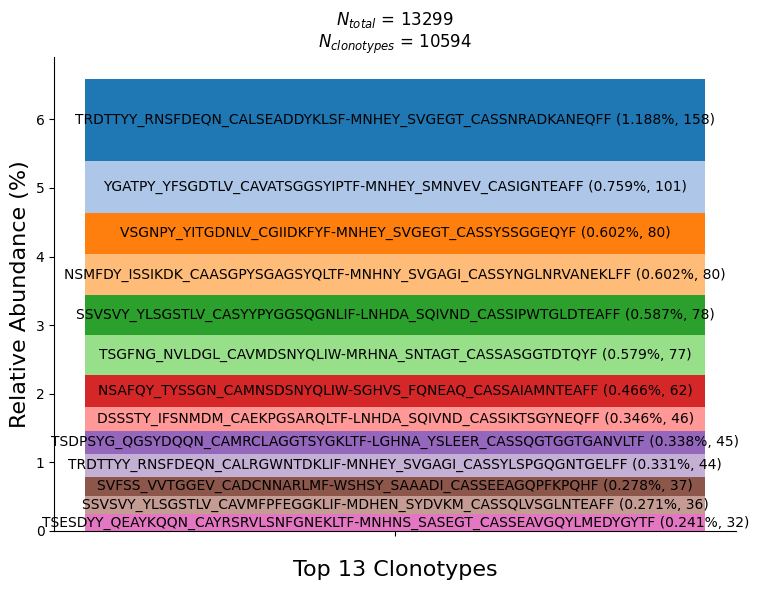

In [30]:
# visualize the top clonotypes by relative abundance
visualize.top_n_clonotypes(tcr_df=qtcr_df, top_n=13)